# Part 2: Real Estate Market Data Exploration in major French cities

In [1]:
pip install datefinder

     |████████████████████████████████| 738 kB 382 kB/s eta 0:00:01
Note: you may need to restart the kernel to use updated packages.


In [2]:
import pyspark
import pandas as pd
import datefinder
import numpy as np
import matplotlib.pyplot as plt

In [3]:
sc = pyspark.SparkContext(appName="Spark RDD")

# Importing the Data 

In [5]:
df= pd.read_csv('data/real_estate_transactions.csv', sep=';')

In [6]:
len(df.keys())

11

In [7]:
rdd_estate = sc.textFile('data/real_estate_transactions.csv') \
               .map(lambda line: line.split(";")) \
               .filter(lambda line: len(line)>1) \
               .map(lambda line: (line[0:]))

In [8]:
'''['City',
  'Sale Date',
  'Sale Type',
  'Price',
  'Postal Code',
  'Commune',
  'Number of lots',
  'Local Type',
  'Living Area',
  'Number of rooms',
  'Land Area']'''

"['City',\n  'Sale Date',\n  'Sale Type',\n  'Price',\n  'Postal Code',\n  'Commune',\n  'Number of lots',\n  'Local Type',\n  'Living Area',\n  'Number of rooms',\n  'Land Area']"

# Cleaning the Data 

In [9]:
header = rdd_estate.first()
#rdd.filter(lambda line: line != header)

In [10]:
rdd_estate = rdd_estate.filter(lambda line: line != header)

rdd_estate.take(10)

[['NICE',
  '26/03/2015',
  'SALE',
  '102000,00',
  '6000',
  'NICE',
  '1',
  'APARTMENT',
  '29',
  '2',
  ''],
 ['NICE',
  '07/04/2015',
  'SALE',
  '32000,00',
  '6000',
  'NICE',
  '1',
  'DEPENDENCY',
  '0',
  '0',
  ''],
 ['NICE',
  '10/04/2015',
  'SALE',
  '239000,00',
  '6200',
  'NICE',
  '1',
  'APARTMENT',
  '51',
  '2',
  ''],
 ['NICE',
  '10/04/2015',
  'SALE',
  '239000,00',
  '6200',
  'NICE',
  '1',
  'DEPENDENCY',
  '0',
  '0',
  ''],
 ['NICE',
  '23/03/2015',
  'SALE',
  '30000,00',
  '6000',
  'NICE',
  '1',
  'DEPENDENCY',
  '0',
  '0',
  ''],
 ['NICE',
  '23/03/2015',
  'SALE',
  '410000,00',
  '6200',
  'NICE',
  '2',
  'APARTMENT',
  '60',
  '3',
  ''],
 ['NICE',
  '08/04/2015',
  'SALE',
  '215000,00',
  '6200',
  'NICE',
  '1',
  'DEPENDENCY',
  '0',
  '0',
  ''],
 ['NICE',
  '08/04/2015',
  'SALE',
  '215000,00',
  '6200',
  'NICE',
  '1',
  'APARTMENT',
  '67',
  '3',
  ''],
 ['NICE',
  '20/03/2015',
  'SALE',
  '625000,00',
  '6200',
  'NICE',
  '0',
  'H

In [11]:
def find_date(tweet) :
    matches = list(datefinder.find_dates(tweet))
    if len(matches) > 0:
        date_ = matches[0]
    else : 
        date_ = None
    return date_

In [12]:
rdd_estate_nb_year = rdd_estate.map(lambda tuple: find_date(tuple[1]).year) 


rdd_estate_nb_year.distinct().count()

5

No need to add city for 2019 transactions (already done)

In [13]:
rdd_estate.filter(lambda tuple: find_date(tuple[1]).year == 2019)

rdd_estate.take(10)

[['NICE',
  '26/03/2015',
  'SALE',
  '102000,00',
  '6000',
  'NICE',
  '1',
  'APARTMENT',
  '29',
  '2',
  ''],
 ['NICE',
  '07/04/2015',
  'SALE',
  '32000,00',
  '6000',
  'NICE',
  '1',
  'DEPENDENCY',
  '0',
  '0',
  ''],
 ['NICE',
  '10/04/2015',
  'SALE',
  '239000,00',
  '6200',
  'NICE',
  '1',
  'APARTMENT',
  '51',
  '2',
  ''],
 ['NICE',
  '10/04/2015',
  'SALE',
  '239000,00',
  '6200',
  'NICE',
  '1',
  'DEPENDENCY',
  '0',
  '0',
  ''],
 ['NICE',
  '23/03/2015',
  'SALE',
  '30000,00',
  '6000',
  'NICE',
  '1',
  'DEPENDENCY',
  '0',
  '0',
  ''],
 ['NICE',
  '23/03/2015',
  'SALE',
  '410000,00',
  '6200',
  'NICE',
  '2',
  'APARTMENT',
  '60',
  '3',
  ''],
 ['NICE',
  '08/04/2015',
  'SALE',
  '215000,00',
  '6200',
  'NICE',
  '1',
  'DEPENDENCY',
  '0',
  '0',
  ''],
 ['NICE',
  '08/04/2015',
  'SALE',
  '215000,00',
  '6200',
  'NICE',
  '1',
  'APARTMENT',
  '67',
  '3',
  ''],
 ['NICE',
  '20/03/2015',
  'SALE',
  '625000,00',
  '6200',
  'NICE',
  '0',
  'H

 keep only sale and sale before completion transactions

In [14]:
rdd_estate.map(lambda tuple: tuple[2]).distinct().count()

6

In [15]:
rdd_estate.take(10)

[['NICE',
  '26/03/2015',
  'SALE',
  '102000,00',
  '6000',
  'NICE',
  '1',
  'APARTMENT',
  '29',
  '2',
  ''],
 ['NICE',
  '07/04/2015',
  'SALE',
  '32000,00',
  '6000',
  'NICE',
  '1',
  'DEPENDENCY',
  '0',
  '0',
  ''],
 ['NICE',
  '10/04/2015',
  'SALE',
  '239000,00',
  '6200',
  'NICE',
  '1',
  'APARTMENT',
  '51',
  '2',
  ''],
 ['NICE',
  '10/04/2015',
  'SALE',
  '239000,00',
  '6200',
  'NICE',
  '1',
  'DEPENDENCY',
  '0',
  '0',
  ''],
 ['NICE',
  '23/03/2015',
  'SALE',
  '30000,00',
  '6000',
  'NICE',
  '1',
  'DEPENDENCY',
  '0',
  '0',
  ''],
 ['NICE',
  '23/03/2015',
  'SALE',
  '410000,00',
  '6200',
  'NICE',
  '2',
  'APARTMENT',
  '60',
  '3',
  ''],
 ['NICE',
  '08/04/2015',
  'SALE',
  '215000,00',
  '6200',
  'NICE',
  '1',
  'DEPENDENCY',
  '0',
  '0',
  ''],
 ['NICE',
  '08/04/2015',
  'SALE',
  '215000,00',
  '6200',
  'NICE',
  '1',
  'APARTMENT',
  '67',
  '3',
  ''],
 ['NICE',
  '20/03/2015',
  'SALE',
  '625000,00',
  '6200',
  'NICE',
  '0',
  'H

In [16]:
rdd_estate_clean = rdd_estate.filter(lambda tuple: tuple[2] == 'SALE' or tuple[2] == 'SALE BEFORE COMPLETION')

rdd_estate_clean.map(lambda tuple: (tuple[2],1))\
                .reduceByKey(lambda x,y : x+y)\
                .sortBy(lambda tuple: tuple[1], ascending=False)\
                .take(2)

[('SALE', 754464), ('SALE BEFORE COMPLETION', 147708)]

In [17]:
rdd_estate_clean.count()

902172

In [18]:
rdd_estate_clean.map(lambda tuple: tuple[2]).distinct().count()

2

keep only apartment and house transactions

In [19]:
rdd_estate.map(lambda tuple: tuple[7]).distinct().count()

5

In [20]:
rdd_estate_clean = rdd_estate_clean.filter(lambda tuple: tuple[7] == 'APARTMENT' or tuple[7] == 'HOUSE')

rdd_estate_clean.map(lambda tuple: (tuple[7],1))\
                .reduceByKey(lambda x,y : x+y)\
                .sortBy(lambda tuple: tuple[1], ascending=False)\
                .take(2)

[('APARTMENT', 445686), ('HOUSE', 37619)]

In [21]:
rdd_estate_clean.count()

483305

remove transactions without prices, postal code, rooms, or living area

In [22]:
rdd_estate_clean.map(lambda tuple: (tuple[8],1))\
                .reduceByKey(lambda x,y : x+y)\
                .sortBy(lambda tuple: tuple[1], ascending=False)\
                .filter(lambda tuple: tuple[1])\
                .collect()

[('30', 10280),
 ('40', 10195),
 ('60', 9155),
 ('50', 9020),
 ('45', 8614),
 ('35', 8074),
 ('70', 7895),
 ('25', 7722),
 ('65', 7694),
 ('20', 7663),
 ('42', 7312),
 ('18', 7245),
 ('32', 7099),
 ('48', 6552),
 ('55', 6453),
 ('28', 6451),
 ('38', 6345),
 ('63', 6262),
 ('68', 6247),
 ('80', 6138),
 ('43', 6107),
 ('67', 6034),
 ('64', 6032),
 ('46', 5950),
 ('66', 5905),
 ('36', 5858),
 ('62', 5824),
 ('44', 5788),
 ('47', 5730),
 ('33', 5582),
 ('52', 5553),
 ('27', 5475),
 ('26', 5374),
 ('41', 5322),
 ('34', 5308),
 ('39', 5285),
 ('56', 5282),
 ('22', 5210),
 ('37', 5176),
 ('24', 5148),
 ('31', 5115),
 ('61', 5002),
 ('29', 4993),
 ('49', 4966),
 ('58', 4876),
 ('57', 4860),
 ('75', 4808),
 ('19', 4802),
 ('23', 4716),
 ('54', 4627),
 ('53', 4576),
 ('72', 4557),
 ('69', 4419),
 ('90', 4358),
 ('51', 4338),
 ('21', 4329),
 ('59', 4301),
 ('17', 3787),
 ('15', 3780),
 ('85', 3657),
 ('16', 3611),
 ('73', 3572),
 ('78', 3552),
 ('71', 3476),
 ('76', 3457),
 ('74', 3451),
 ('82', 

In [23]:
rdd_estate_clean = rdd_estate_clean.filter(lambda tuple: tuple[3] != '')\
                                   .filter(lambda tuple: tuple[4] != '')\
                                   .filter(lambda tuple: tuple[9] != '')\
                                   .filter(lambda tuple: tuple[8] != '')

rdd_estate_clean.take(10)            

[['NICE',
  '26/03/2015',
  'SALE',
  '102000,00',
  '6000',
  'NICE',
  '1',
  'APARTMENT',
  '29',
  '2',
  ''],
 ['NICE',
  '10/04/2015',
  'SALE',
  '239000,00',
  '6200',
  'NICE',
  '1',
  'APARTMENT',
  '51',
  '2',
  ''],
 ['NICE',
  '23/03/2015',
  'SALE',
  '410000,00',
  '6200',
  'NICE',
  '2',
  'APARTMENT',
  '60',
  '3',
  ''],
 ['NICE',
  '08/04/2015',
  'SALE',
  '215000,00',
  '6200',
  'NICE',
  '1',
  'APARTMENT',
  '67',
  '3',
  ''],
 ['NICE',
  '20/03/2015',
  'SALE',
  '625000,00',
  '6200',
  'NICE',
  '0',
  'HOUSE',
  '160',
  '5',
  '500'],
 ['NICE',
  '20/03/2015',
  'SALE',
  '625000,00',
  '6200',
  'NICE',
  '0',
  'HOUSE',
  '160',
  '5',
  '1267'],
 ['NICE',
  '02/04/2015',
  'SALE',
  '130000,00',
  '6200',
  'NICE',
  '1',
  'APARTMENT',
  '31',
  '1',
  ''],
 ['NICE',
  '24/03/2015',
  'SALE',
  '115000,00',
  '6000',
  'NICE',
  '2',
  'APARTMENT',
  '50',
  '2',
  ''],
 ['NICE',
  '03/04/2015',
  'SALE',
  '172500,00',
  '6100',
  'NICE',
  '2',
 

In [24]:
rdd_estate_clean.count()

478005

In [25]:
def replaceNullValueByZero(tup):
    if tup[10] != '': 
        return tup
    else: 
        tup[10] = 0
        return tup

In [26]:
rdd_estate_clean.take(1)

[['NICE',
  '26/03/2015',
  'SALE',
  '102000,00',
  '6000',
  'NICE',
  '1',
  'APARTMENT',
  '29',
  '2',
  '']]

In [27]:
rdd_estate_clean = rdd_estate_clean.map(lambda tup: replaceNullValueByZero(tup))

rdd_estate_clean.take(10)

[['NICE',
  '26/03/2015',
  'SALE',
  '102000,00',
  '6000',
  'NICE',
  '1',
  'APARTMENT',
  '29',
  '2',
  0],
 ['NICE',
  '10/04/2015',
  'SALE',
  '239000,00',
  '6200',
  'NICE',
  '1',
  'APARTMENT',
  '51',
  '2',
  0],
 ['NICE',
  '23/03/2015',
  'SALE',
  '410000,00',
  '6200',
  'NICE',
  '2',
  'APARTMENT',
  '60',
  '3',
  0],
 ['NICE',
  '08/04/2015',
  'SALE',
  '215000,00',
  '6200',
  'NICE',
  '1',
  'APARTMENT',
  '67',
  '3',
  0],
 ['NICE',
  '20/03/2015',
  'SALE',
  '625000,00',
  '6200',
  'NICE',
  '0',
  'HOUSE',
  '160',
  '5',
  '500'],
 ['NICE',
  '20/03/2015',
  'SALE',
  '625000,00',
  '6200',
  'NICE',
  '0',
  'HOUSE',
  '160',
  '5',
  '1267'],
 ['NICE',
  '02/04/2015',
  'SALE',
  '130000,00',
  '6200',
  'NICE',
  '1',
  'APARTMENT',
  '31',
  '1',
  0],
 ['NICE',
  '24/03/2015',
  'SALE',
  '115000,00',
  '6000',
  'NICE',
  '2',
  'APARTMENT',
  '50',
  '2',
  0],
 ['NICE',
  '03/04/2015',
  'SALE',
  '172500,00',
  '6100',
  'NICE',
  '2',
  'APAR

In [28]:
rdd_estate_clean.count()

478005

fix price : int transformation

In [29]:
rdd_estate_clean.map(lambda tuple: (tuple[3],1))\
                .reduceByKey(lambda x,y : x+y)\
                .sortBy(lambda tuple: tuple[1], ascending=False)\
                .filter(lambda tuple: tuple[1])\
                .collect()

[('150000,00', 3715),
 ('200000,00', 3577),
 ('120000,00', 3380),
 ('100000,00', 3198),
 ('130000,00', 3190),
 ('160000,00', 3110),
 ('110000,00', 3087),
 ('140000,00', 3018),
 ('180000,00', 2986),
 ('170000,00', 2856),
 ('300000,00', 2855),
 ('250000,00', 2822),
 ('220000,00', 2811),
 ('210000,00', 2694),
 ('230000,00', 2573),
 ('90000,00', 2549),
 ('190000,00', 2499),
 ('240000,00', 2425),
 ('115000,00', 2362),
 ('80000,00', 2361),
 ('125000,00', 2350),
 ('165000,00', 2321),
 ('135000,00', 2265),
 ('145000,00', 2236),
 ('105000,00', 2113),
 ('155000,00', 2106),
 ('175000,00', 2097),
 ('280000,00', 2094),
 ('350000,00', 2069),
 ('260000,00', 2057),
 ('400000,00', 2027),
 ('185000,00', 1924),
 ('70000,00', 1914),
 ('270000,00', 1902),
 ('95000,00', 1878),
 ('85000,00', 1835),
 ('215000,00', 1768),
 ('320000,00', 1722),
 ('290000,00', 1714),
 ('75000,00', 1700),
 ('195000,00', 1688),
 ('235000,00', 1677),
 ('205000,00', 1673),
 ('225000,00', 1609),
 ('450000,00', 1608),
 ('310000,00', 1

In [30]:
def replaceStringToInt(tup):
        tup[3] = tup[3].split(',')[0]
        tup[3] = int(tup[3])
        
        tup[6] = int(tup[6])
        tup[8] = float(tup[8])
        tup[9] = int(tup[9])
        tup[10] = float(tup[10])
        
        return tup

In [31]:
rdd_estate_clean = rdd_estate_clean.map(lambda tup: replaceStringToInt(tup))

In [32]:
rdd_estate_clean.take(1)

[['NICE',
  '26/03/2015',
  'SALE',
  102000,
  '6000',
  'NICE',
  1,
  'APARTMENT',
  29.0,
  2,
  0.0]]

In [33]:
rdd_estate_clean.count()

478005

M² Price Filter per City

In [34]:
rdd_estate_clean = rdd_estate_clean.map(lambda tuple: list(tuple))

rdd_estate_clean.take(10)

[['NICE',
  '26/03/2015',
  'SALE',
  102000,
  '6000',
  'NICE',
  1,
  'APARTMENT',
  29.0,
  2,
  0.0],
 ['NICE',
  '10/04/2015',
  'SALE',
  239000,
  '6200',
  'NICE',
  1,
  'APARTMENT',
  51.0,
  2,
  0.0],
 ['NICE',
  '23/03/2015',
  'SALE',
  410000,
  '6200',
  'NICE',
  2,
  'APARTMENT',
  60.0,
  3,
  0.0],
 ['NICE',
  '08/04/2015',
  'SALE',
  215000,
  '6200',
  'NICE',
  1,
  'APARTMENT',
  67.0,
  3,
  0.0],
 ['NICE',
  '20/03/2015',
  'SALE',
  625000,
  '6200',
  'NICE',
  0,
  'HOUSE',
  160.0,
  5,
  500.0],
 ['NICE',
  '20/03/2015',
  'SALE',
  625000,
  '6200',
  'NICE',
  0,
  'HOUSE',
  160.0,
  5,
  1267.0],
 ['NICE',
  '02/04/2015',
  'SALE',
  130000,
  '6200',
  'NICE',
  1,
  'APARTMENT',
  31.0,
  1,
  0.0],
 ['NICE',
  '24/03/2015',
  'SALE',
  115000,
  '6000',
  'NICE',
  2,
  'APARTMENT',
  50.0,
  2,
  0.0],
 ['NICE',
  '03/04/2015',
  'SALE',
  172500,
  '6100',
  'NICE',
  2,
  'APARTMENT',
  63.0,
  4,
  0.0],
 ['NICE',
  '09/04/2015',
  'SALE',
  

In [35]:
def priceperM2(tup):
        tup.append(int(tup[3])/int(tup[8]))
        return tup

In [36]:
#list[11] = price per m²

rdd_estate_clean = rdd_estate_clean.map(lambda tup: priceperM2(tup))

rdd_estate_clean.take(10)

[['NICE',
  '26/03/2015',
  'SALE',
  102000,
  '6000',
  'NICE',
  1,
  'APARTMENT',
  29.0,
  2,
  0.0,
  3517.2413793103447],
 ['NICE',
  '10/04/2015',
  'SALE',
  239000,
  '6200',
  'NICE',
  1,
  'APARTMENT',
  51.0,
  2,
  0.0,
  4686.274509803921],
 ['NICE',
  '23/03/2015',
  'SALE',
  410000,
  '6200',
  'NICE',
  2,
  'APARTMENT',
  60.0,
  3,
  0.0,
  6833.333333333333],
 ['NICE',
  '08/04/2015',
  'SALE',
  215000,
  '6200',
  'NICE',
  1,
  'APARTMENT',
  67.0,
  3,
  0.0,
  3208.955223880597],
 ['NICE',
  '20/03/2015',
  'SALE',
  625000,
  '6200',
  'NICE',
  0,
  'HOUSE',
  160.0,
  5,
  500.0,
  3906.25],
 ['NICE',
  '20/03/2015',
  'SALE',
  625000,
  '6200',
  'NICE',
  0,
  'HOUSE',
  160.0,
  5,
  1267.0,
  3906.25],
 ['NICE',
  '02/04/2015',
  'SALE',
  130000,
  '6200',
  'NICE',
  1,
  'APARTMENT',
  31.0,
  1,
  0.0,
  4193.548387096775],
 ['NICE',
  '24/03/2015',
  'SALE',
  115000,
  '6000',
  'NICE',
  2,
  'APARTMENT',
  50.0,
  2,
  0.0,
  2300.0],
 ['NICE

In [37]:
rdd_estate_clean.count()

478005

In [38]:
def filterPricePerM2PerCity(tup):
    if tup[0] == 'NANTES' and 0 <= tup[11] <= 10000: 
        return tup
    elif tup[0] == 'TOULOUSE' and 0 <= tup[11] <= 10000:
        return tup
    elif tup[0] == 'MONTPELLIER' and 0 <= tup[11] <= 12000:
        return tup 
    elif tup[0] == 'LILLE' and 0 <= tup[11] <= 9000:
        return tup
    elif tup[0] == 'BORDEAUX' and 0 <= tup[11] <= 12000:
        return tup 
    elif tup[0] == 'PARIS' and 0 <= tup[11] <= 49000:
        return tup 
    elif tup[0] == 'LYON' and 0 <= tup[11] <= 15000:
        return tup 
    elif tup[0] == 'MARSEILLE' and 0 <= tup[11] <= 12000:
        return tup 
    elif tup[0] == 'NICE' and 0 <= tup[11] <= 15000:
        return tup
    

In [39]:
rdd_estate_clean = rdd_estate_clean.map(lambda tup : filterPricePerM2PerCity(tup))\
                                   .filter(lambda tup : tup != None)

rdd_estate_clean.take(10)

[['NICE',
  '26/03/2015',
  'SALE',
  102000,
  '6000',
  'NICE',
  1,
  'APARTMENT',
  29.0,
  2,
  0.0,
  3517.2413793103447],
 ['NICE',
  '10/04/2015',
  'SALE',
  239000,
  '6200',
  'NICE',
  1,
  'APARTMENT',
  51.0,
  2,
  0.0,
  4686.274509803921],
 ['NICE',
  '23/03/2015',
  'SALE',
  410000,
  '6200',
  'NICE',
  2,
  'APARTMENT',
  60.0,
  3,
  0.0,
  6833.333333333333],
 ['NICE',
  '08/04/2015',
  'SALE',
  215000,
  '6200',
  'NICE',
  1,
  'APARTMENT',
  67.0,
  3,
  0.0,
  3208.955223880597],
 ['NICE',
  '20/03/2015',
  'SALE',
  625000,
  '6200',
  'NICE',
  0,
  'HOUSE',
  160.0,
  5,
  500.0,
  3906.25],
 ['NICE',
  '20/03/2015',
  'SALE',
  625000,
  '6200',
  'NICE',
  0,
  'HOUSE',
  160.0,
  5,
  1267.0,
  3906.25],
 ['NICE',
  '02/04/2015',
  'SALE',
  130000,
  '6200',
  'NICE',
  1,
  'APARTMENT',
  31.0,
  1,
  0.0,
  4193.548387096775],
 ['NICE',
  '24/03/2015',
  'SALE',
  115000,
  '6000',
  'NICE',
  2,
  'APARTMENT',
  50.0,
  2,
  0.0,
  2300.0],
 ['NICE

Price Filtering (20000 - 11 999 999)

In [40]:
rdd_estate_clean = rdd_estate_clean.filter(lambda tup : 20000 <= tup[3] <= 11999999)

rdd_estate_clean.count()

428261

Number of rooms filtering 

In [41]:
rdd_estate_clean = rdd_estate_clean.filter(lambda tup : 0 <= int(tup[9]) <= 25)

rdd_estate_clean.count()

428253

In [42]:
rdd_estate_clean.filter(lambda tup: tup[11] == None or tup[11] == '').collect()

[]

# Data Visualization 

In [43]:
def cluster(tup):
    if tup[0] == 'NANTES' or tup[0] == 'TOULOUSE' or tup[0] == 'MONTPELLIER' or tup[0] == 'LILLE' or tup[0] == 'MARSEILLE':
        tup.append(2); 
        return tup
    elif tup[0] == 'LYON' or tup[0] == 'BORDEAUX' or tup[0]=='NICE':
        tup.append(1); 
        return tup
    elif tup[0] == 'PARIS': 
        tup.append(0); 
        return tup

In [44]:
rdd_estate_clean = rdd_estate_clean.map(lambda tup : cluster(tup))

In [45]:
rdd_estate_clean

PythonRDD[88] at RDD at PythonRDD.scala:53

In [46]:
spark = pyspark.sql.SparkSession.builder.appName("Spark-Dataframe-SQL").getOrCreate()

with an implicit schema

In [47]:
estate_clean_df = rdd_estate_clean.toDF(['City',
  'Sale Date',
  'Sale Type',
  'Price',
  'Postal Code',
  'Commune',
  'Number of lots',
  'Local Type',
  'Living Area',
  'Number of rooms',
  'Land Area', 
 'Price per M²', 
 'Cluster'])

estate_clean_df.show()

+----+----------+--------------------+------+-----------+-------+--------------+----------+-----------+---------------+---------+------------------+-------+
|City| Sale Date|           Sale Type| Price|Postal Code|Commune|Number of lots|Local Type|Living Area|Number of rooms|Land Area|      Price per M²|Cluster|
+----+----------+--------------------+------+-----------+-------+--------------+----------+-----------+---------------+---------+------------------+-------+
|NICE|26/03/2015|                SALE|102000|       6000|   NICE|             1| APARTMENT|       29.0|              2|      0.0|3517.2413793103447|      1|
|NICE|10/04/2015|                SALE|239000|       6200|   NICE|             1| APARTMENT|       51.0|              2|      0.0| 4686.274509803921|      1|
|NICE|23/03/2015|                SALE|410000|       6200|   NICE|             2| APARTMENT|       60.0|              3|      0.0| 6833.333333333333|      1|
|NICE|08/04/2015|                SALE|215000|       6200| 

In [48]:
estate_clean_df.printSchema()

root
 |-- City: string (nullable = true)
 |-- Sale Date: string (nullable = true)
 |-- Sale Type: string (nullable = true)
 |-- Price: long (nullable = true)
 |-- Postal Code: string (nullable = true)
 |-- Commune: string (nullable = true)
 |-- Number of lots: long (nullable = true)
 |-- Local Type: string (nullable = true)
 |-- Living Area: double (nullable = true)
 |-- Number of rooms: long (nullable = true)
 |-- Land Area: double (nullable = true)
 |-- Price per M²: double (nullable = true)
 |-- Cluster: long (nullable = true)



with an explicit schema

In [49]:
# we first need to import types (e.g. StructType, StructField, IntegerType, etc.)
from pyspark.sql.types import *

In [50]:
# schema creation

estateSchema =StructType ( [StructField("City", StringType(), False),
                              StructField("Sale Date", StringType(), False),
                              StructField("Sale Type", StringType(), False),
                              StructField("Price", LongType(), False),
                              StructField("Postal Code", StringType(), False),
                              StructField("Commune", StringType(), False),
                              StructField("Number of lots", LongType(), False),
                              StructField("Local Type", StringType(), False),
                              StructField("Living Area", DoubleType(), False),
                              StructField("Number of rooms", LongType(), False),
                              StructField("Land Area", DoubleType(), False),
                              StructField("Price per M²", DoubleType(), False),
                              StructField("Cluster", IntegerType(), False),
                             ] )

estate_clean_df_explicit = spark.createDataFrame(rdd_estate_clean, estateSchema)

estate_clean_df_explicit.show()

+----+----------+--------------------+------+-----------+-------+--------------+----------+-----------+---------------+---------+------------------+-------+
|City| Sale Date|           Sale Type| Price|Postal Code|Commune|Number of lots|Local Type|Living Area|Number of rooms|Land Area|      Price per M²|Cluster|
+----+----------+--------------------+------+-----------+-------+--------------+----------+-----------+---------------+---------+------------------+-------+
|NICE|26/03/2015|                SALE|102000|       6000|   NICE|             1| APARTMENT|       29.0|              2|      0.0|3517.2413793103447|      1|
|NICE|10/04/2015|                SALE|239000|       6200|   NICE|             1| APARTMENT|       51.0|              2|      0.0| 4686.274509803921|      1|
|NICE|23/03/2015|                SALE|410000|       6200|   NICE|             2| APARTMENT|       60.0|              3|      0.0| 6833.333333333333|      1|
|NICE|08/04/2015|                SALE|215000|       6200| 

In [51]:
estate_clean_df_explicit.printSchema()

root
 |-- City: string (nullable = false)
 |-- Sale Date: string (nullable = false)
 |-- Sale Type: string (nullable = false)
 |-- Price: long (nullable = false)
 |-- Postal Code: string (nullable = false)
 |-- Commune: string (nullable = false)
 |-- Number of lots: long (nullable = false)
 |-- Local Type: string (nullable = false)
 |-- Living Area: double (nullable = false)
 |-- Number of rooms: long (nullable = false)
 |-- Land Area: double (nullable = false)
 |-- Price per M²: double (nullable = false)
 |-- Cluster: integer (nullable = false)



Spark SQL queries on DataFrames

In [52]:
#Creating the temporary view from the DataFrame

estate_clean_df_explicit.createOrReplaceTempView('estate')

In [53]:
spark.sql("SELECT * FROM estate").show()

+----+----------+--------------------+------+-----------+-------+--------------+----------+-----------+---------------+---------+------------------+-------+
|City| Sale Date|           Sale Type| Price|Postal Code|Commune|Number of lots|Local Type|Living Area|Number of rooms|Land Area|      Price per M²|Cluster|
+----+----------+--------------------+------+-----------+-------+--------------+----------+-----------+---------------+---------+------------------+-------+
|NICE|26/03/2015|                SALE|102000|       6000|   NICE|             1| APARTMENT|       29.0|              2|      0.0|3517.2413793103447|      1|
|NICE|10/04/2015|                SALE|239000|       6200|   NICE|             1| APARTMENT|       51.0|              2|      0.0| 4686.274509803921|      1|
|NICE|23/03/2015|                SALE|410000|       6200|   NICE|             2| APARTMENT|       60.0|              3|      0.0| 6833.333333333333|      1|
|NICE|08/04/2015|                SALE|215000|       6200| 

In [54]:
spark.sql("SELECT COUNT(*) FROM estate").show()

+--------+
|count(1)|
+--------+
|  428253|
+--------+



In [55]:
spark.sql("SELECT CITY, round(AVG(Price)) \
          FROM estate \
          GROUP BY CITY").show()

+-----------+--------------------+
|       CITY|round(avg(Price), 0)|
+-----------+--------------------+
|       NICE|            245600.0|
|      LILLE|            184828.0|
|      PARIS|            540937.0|
|   BORDEAUX|            289528.0|
|       LYON|            256841.0|
|  MARSEILLE|            197480.0|
|MONTPELLIER|            181678.0|
|     NANTES|            211405.0|
|   TOULOUSE|            196595.0|
+-----------+--------------------+



In [56]:
spark.sql("SELECT DISTINCT CITY FROM estate").show()

+-----------+
|       CITY|
+-----------+
|       NICE|
|      LILLE|
|      PARIS|
|   BORDEAUX|
|       LYON|
|  MARSEILLE|
|MONTPELLIER|
|     NANTES|
|   TOULOUSE|
+-----------+



# # Colors

In [59]:
colors = {0 : '#FF0000', 1 : '#E48619', 2 : '#19DAE4'}

## Graph 1 : Price per m² per city 

In [60]:
spark.sql("SELECT CITY, int(round(AVG(`Price per M²`))) \
          AS `PRICE PER M²`, CLUSTER \
          FROM estate \
          GROUP BY CITY, CLUSTER \
          ORDER BY `PRICE PER M²` DESC").show()

+-----------+------------+-------+
|       CITY|PRICE PER M²|CLUSTER|
+-----------+------------+-------+
|      PARIS|        9982|      0|
|   BORDEAUX|        4250|      1|
|       NICE|        4146|      1|
|       LYON|        3962|      1|
|   TOULOUSE|        3220|      2|
|      LILLE|        3196|      2|
|     NANTES|        3191|      2|
|MONTPELLIER|        3162|      2|
|  MARSEILLE|        3123|      2|
+-----------+------------+-------+



In [61]:
type(spark.sql("SELECT CITY, int(AVG(`Price per M²`)) \
          AS `PRICE PER M²`, CLUSTER \
          FROM estate \
          GROUP BY CITY, CLUSTER \
          ORDER BY `PRICE PER M²` DESC"))

pyspark.sql.dataframe.DataFrame

In [62]:
df_1 = spark.sql("SELECT CITY, int(round(AVG(`Price per M²`))) \
          AS `PRICE PER M²`, CLUSTER \
          FROM estate \
          GROUP BY CITY, CLUSTER \
          ORDER BY `PRICE PER M²` DESC").toPandas()

In [63]:
df_1["CLUSTER"]

0    0
1    1
2    1
3    1
4    2
5    2
6    2
7    2
8    2
Name: CLUSTER, dtype: int32

In [64]:
#colors = tuple(np.where(df_1["PRICE PER M²"]>5000, 'r', 
#         (np.where(df_1["PRICE PER M²"]>3500, '#E48619', '#19DAE4'))))

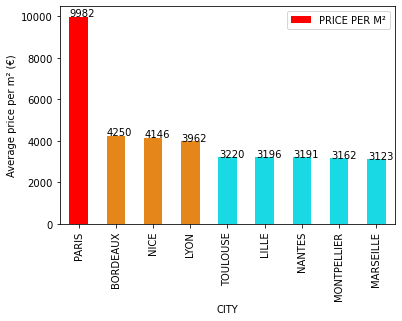

In [65]:
barplot = df_1.plot.bar(x='CITY', y='PRICE PER M²', color=df_1["CLUSTER"].map(colors))

barplot.set_ylabel("Average price per m² (€)")

for p in barplot.patches:
    barplot.annotate(str(p.get_height()), (p.get_x() * 1.005, p.get_height() * 1.005))

## Graph 2 : Price per m² per city (MAP)

In [67]:
pip install folium

     |████████████████████████████████| 93 kB 344 kB/s eta 0:00:01
Note: you may need to restart the kernel to use updated packages.


In [74]:
df_1['lon'] = [48.85,44.83,43.70,45.75,43.60,50.63,47.21,43.6,43.3]
df_1['lat'] = [2.3488,-0.56,7.26,4.85, 1.44,3.06,-1.55, 3.88,5.4]
df_1


# import the library
import folium
import pandas as pd
 

data = df_1
data['value'] = data['PRICE PER M²']
data['value']=data.value.astype(float)
data['name']  = data['CITY']
# Make an empty map
m = folium.Map(location=[50,2], tiles='OpenStreetMap', zoom_start=5)
 
# I can add marker one by one on the map
for i in range(0,len(data)):
       folium.Circle(
          location=[data.iloc[i]['lon'], data.iloc[i]['lat']],
          popup= data['name'][i] + ': '+ str(data['value'][i])+'euros le m2',
          radius=data.iloc[i]['value']*10,
          color= df_1['CLUSTER'].map(colors)[i],
          fill=True,
          fill_color=df_1['CLUSTER'].map(colors)[i]).add_to(m)
m



## Graph 3 : Price per m² per commune

In [743]:
estate_clean_df_explicit.printSchema()

root
 |-- City: string (nullable = false)
 |-- Sale Date: string (nullable = false)
 |-- Sale Type: string (nullable = false)
 |-- Price: long (nullable = false)
 |-- Postal Code: string (nullable = false)
 |-- Commune: string (nullable = false)
 |-- Number of lots: long (nullable = false)
 |-- Local Type: string (nullable = false)
 |-- Living Area: double (nullable = false)
 |-- Number of rooms: long (nullable = false)
 |-- Land Area: double (nullable = false)
 |-- Price per M²: double (nullable = false)
 |-- Cluster: integer (nullable = false)



In [744]:
spark.sql("SELECT CITY, COMMUNE, int(round(AVG(`Price per M²`))) \
          AS `PRICE PER M²`, CLUSTER \
          FROM estate \
          GROUP BY CITY, COMMUNE, CLUSTER \
          ORDER BY `PRICE PER M²` DESC").show()

+-----+--------+------------+-------+
| CITY| COMMUNE|PRICE PER M²|CLUSTER|
+-----+--------+------------+-------+
|PARIS|PARIS 06|       13923|      0|
|PARIS|PARIS 07|       13485|      0|
|PARIS|PARIS 04|       12806|      0|
|PARIS|PARIS 01|       12647|      0|
|PARIS|PARIS 05|       11919|      0|
|PARIS|PARIS 08|       11566|      0|
|PARIS|PARIS 03|       11556|      0|
|PARIS|PARIS 02|       10712|      0|
|PARIS|PARIS 16|       10521|      0|
|PARIS|PARIS 09|       10400|      0|
|PARIS|PARIS 14|       10055|      0|
|PARIS|PARIS 17|        9911|      0|
|PARIS|PARIS 10|        9793|      0|
|PARIS|PARIS 11|        9580|      0|
|PARIS|PARIS 15|        9483|      0|
|PARIS|PARIS 18|        9058|      0|
|PARIS|PARIS 12|        8880|      0|
|PARIS|PARIS 13|        8796|      0|
|PARIS|PARIS 20|        8693|      0|
|PARIS|PARIS 19|        8609|      0|
+-----+--------+------------+-------+
only showing top 20 rows



In [76]:
df_3 = spark.sql("SELECT CITY, COMMUNE, int(round(AVG(`Price per M²`))) \
          AS `PRICE PER M²`, CLUSTER \
          FROM estate \
          GROUP BY CITY, COMMUNE, CLUSTER \
          ORDER BY `PRICE PER M²` DESC").toPandas()
df_3

,CITY,COMMUNE,PRICE PER M²,CLUSTER
0,PARIS,PARIS 06,13923,0
1,PARIS,PARIS 07,13485,0
2,PARIS,PARIS 04,12806,0
3,PARIS,PARIS 01,12647,0
4,PARIS,PARIS 05,11919,0
5,PARIS,PARIS 08,11566,0
6,PARIS,PARIS 03,11556,0
7,PARIS,PARIS 02,10712,0
8,PARIS,PARIS 16,10521,0
9,PARIS,PARIS 09,10400,0


Text(0, 0.5, 'Average price per m² (€)')

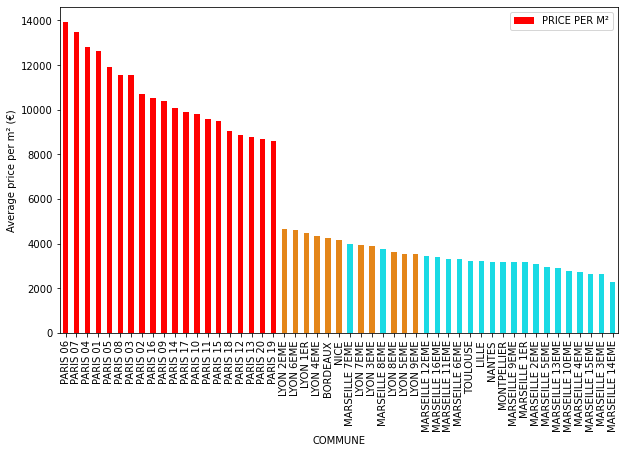

In [99]:
barplot_3 = df_3.plot.bar(x='COMMUNE', y='PRICE PER M²',
                         color = df_3["CLUSTER"].map(colors))
plt.rcParams['figure.figsize'] = (10,8)

barplot_3.set_ylabel("Average price per m² (€)")

#for p in barplot.patches:
#    barplot.annotate(str(p.get_height()), (p.get_x() * 1.005, p.get_height() * 1.005))

## Graph 4 - Transaction volume of the agency over 5 years by cluster and city

In [747]:
spark.sql("SELECT CITY, count(*) \
          AS `NUMBER OF TRANSACTIONS`, CLUSTER \
          FROM estate \
          GROUP BY CITY, CLUSTER \
          ORDER BY `NUMBER OF TRANSACTIONS` DESC").show()

+-----------+----------------------+-------+
|       CITY|NUMBER OF TRANSACTIONS|CLUSTER|
+-----------+----------------------+-------+
|      PARIS|                153024|      0|
|  MARSEILLE|                 61404|      2|
|   TOULOUSE|                 45683|      2|
|       NICE|                 35409|      1|
|       LYON|                 32839|      1|
|     NANTES|                 29106|      2|
|   BORDEAUX|                 26852|      1|
|MONTPELLIER|                 22821|      2|
|      LILLE|                 21115|      2|
+-----------+----------------------+-------+



In [42]:
df_4 = spark.sql("SELECT CITY, count(*) \
          AS `NUMBER OF TRANSACTIONS`, CLUSTER \
          FROM estate \
          GROUP BY CITY, CLUSTER \
          ORDER BY `NUMBER OF TRANSACTIONS` DESC").toPandas()

df_4

,CITY,NUMBER OF TRANSACTIONS,CLUSTER
0,PARIS,153024,0
1,MARSEILLE,61404,2
2,TOULOUSE,45683,2
3,NICE,35409,1
4,LYON,32839,1
5,NANTES,29106,2
6,BORDEAUX,26852,1
7,MONTPELLIER,22821,2
8,LILLE,21115,2


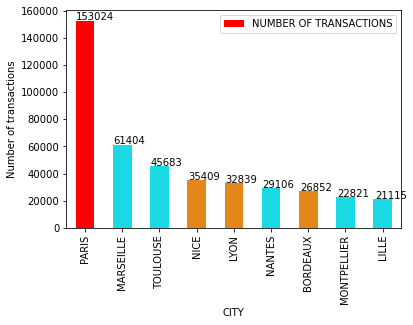

In [43]:
barplot_4 = df_4.plot.bar(x='CITY', y='NUMBER OF TRANSACTIONS', color=df_4["CLUSTER"].map(colors))

barplot_4.set_ylabel("Number of transactions")

for p in barplot_4.patches:
    barplot_4.annotate(str(p.get_height()), (p.get_x() * 1.005, p.get_height() * 1.005))

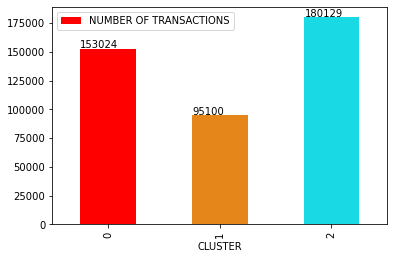

In [44]:
df_4_bis = df_4.groupby(['CLUSTER'])['NUMBER OF TRANSACTIONS'].sum()

df_4_bis_bis = pd.DataFrame({'CLUSTER':df_4_bis.index, 'NUMBER OF TRANSACTIONS':df_4_bis.values})

#df_4_bis
barplot_4_bis_bis = df_4_bis_bis.plot.bar(x='CLUSTER', y='NUMBER OF TRANSACTIONS', color=df_4_bis_bis["CLUSTER"].map(colors))
barplot_4_bis_bis

for p in barplot_4_bis_bis.patches:
    barplot_4_bis_bis.annotate(str(p.get_height()), (p.get_x() * 1.005, p.get_height() * 1.005))

In [45]:
df_bis = df_4.pivot(index='CLUSTER', columns='CITY', values='NUMBER OF TRANSACTIONS').fillna(0)
df_bis

CITY,BORDEAUX,LILLE,LYON,MARSEILLE,MONTPELLIER,NANTES,NICE,PARIS,TOULOUSE
CLUSTER,,,,,,,,,
0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,153024.0,0.0
1,26852.0,0.0,32839.0,0.0,0.0,0.0,35409.0,0.0,0.0
2,0.0,21115.0,0.0,61404.0,22821.0,29106.0,0.0,0.0,45683.0


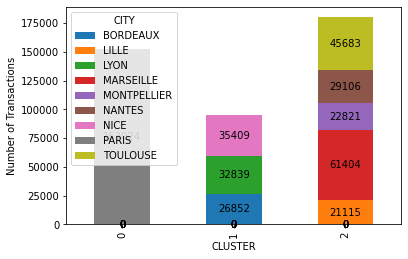

In [46]:
barplot_4_bis = df_bis.plot(kind='bar', stacked=True)

barplot_4_bis.set_ylabel("Number of Transactions")

#for p in barplot_4_bis.patches:
#    barplot_4_bis.annotate(str(p.get_height()), (p.get_x() * 1.005, p.get_height() * 1.005))

for p in barplot_4_bis.patches:
    width, height = p.get_width(), p.get_height()
    x, y = p.get_xy() 
    barplot_4_bis.text(x+width/2, 
            y+height/2, 
            '{:.0f}'.format(height), 
            horizontalalignment='center', 
            verticalalignment='center')


## Graph 5 - (Forecast) Price per m² per city per year

In [758]:
spark.sql("SELECT CLUSTER, SUBSTRING(`Sale Date`, 4, 7) as `DATE`, \
          int(round(AVG(`Price per M²`))) \
          AS `PRICE PER M²` \
          FROM estate\
          GROUP BY CLUSTER, DATE\
          ORDER BY CLUSTER, DATE\
          ").show()

+-------+-------+------------+
|CLUSTER|   DATE|PRICE PER M²|
+-------+-------+------------+
|      0|01/2015|        8968|
|      0|01/2016|        9251|
|      0|01/2017|        9602|
|      0|01/2018|       11342|
|      0|01/2019|       11227|
|      0|02/2015|        9354|
|      0|02/2016|        8917|
|      0|02/2017|        9631|
|      0|02/2018|       10117|
|      0|02/2019|       11407|
|      0|03/2015|        8929|
|      0|03/2016|        9609|
|      0|03/2017|        9662|
|      0|03/2018|       10077|
|      0|03/2019|       11073|
|      0|04/2015|        8656|
|      0|04/2016|        9316|
|      0|04/2017|        9687|
|      0|04/2018|       10731|
|      0|04/2019|       11215|
+-------+-------+------------+
only showing top 20 rows



In [47]:
df_5 = spark.sql("SELECT CLUSTER, SUBSTRING(`Sale Date`, 4, 7) as `DATE`, \
          int(round(AVG(`Price per M²`))) \
          AS `PRICE PER M²` \
          FROM estate\
          GROUP BY CLUSTER, DATE\
          ORDER BY CLUSTER, DATE\
          ").toPandas()

df_5

,CLUSTER,DATE,PRICE PER M²
0,0,01/2015,8968
1,0,01/2016,9251
2,0,01/2017,9602
3,0,01/2018,11342
4,0,01/2019,11227
...,...,...,...
157,2,11/2018,3243
158,2,12/2015,3171
159,2,12/2016,3288
160,2,12/2017,3431


In [48]:
df_5['DATE'] = pd.to_datetime(df_5['DATE'], format='%m/%Y')

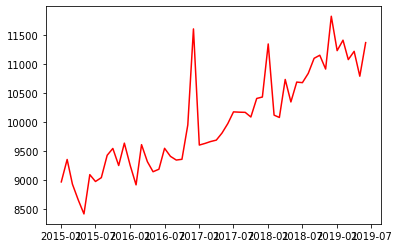

In [52]:
df_cluster_0 = df_5[df_5['CLUSTER'] == 0]
df_cluster_0 = df_cluster_0.sort_values(by='DATE')

plt.plot(df_cluster_0['DATE'], df_cluster_0['PRICE PER M²'], color='r')
plt.show()

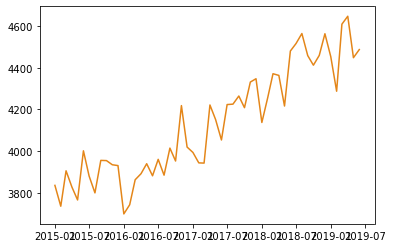

In [53]:
df_cluster_1 = df_5[df_5['CLUSTER'] == 1]
df_cluster_1 = df_cluster_1.sort_values(by='DATE')

plt.plot(df_cluster_1['DATE'], df_cluster_1['PRICE PER M²'], color='#E48619')
plt.show()

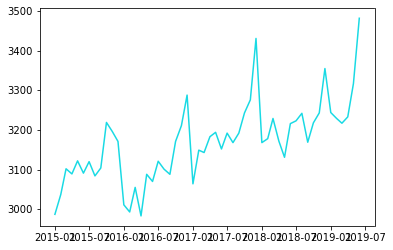

In [54]:
df_cluster_2 = df_5[df_5['CLUSTER'] == 2]
df_cluster_2 = df_cluster_2.sort_values(by='DATE')

plt.plot(df_cluster_2['DATE'], df_cluster_2['PRICE PER M²'], color='#19DAE4')
plt.show()

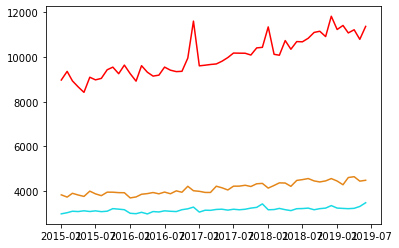

In [288]:
plt.plot(df_cluster_0['DATE'], df_cluster_0['PRICE PER M²'], color='r')
plt.plot(df_cluster_1['DATE'], df_cluster_1['PRICE PER M²'], color='#E48619')
plt.plot(df_cluster_2['DATE'], df_cluster_2['PRICE PER M²'], color='#19DAE4')

plt.show()

# Time Series Analysis

In [305]:
import statsmodels.api as sm
#from statsmodels.tsa.arima_model import ARIMA, ARIMAResults
from statsmodels.tsa.arima.model import ARIMA
from statsmodels.tsa.stattools import acf, pacf
from statsmodels.graphics.tsaplots import plot_acf, plot_pacf
from statsmodels.tsa.seasonal import seasonal_decompose

In [207]:
ts = pd.Series(df_cluster_0['PRICE PER M²'].values, index = df_cluster_0['DATE'])

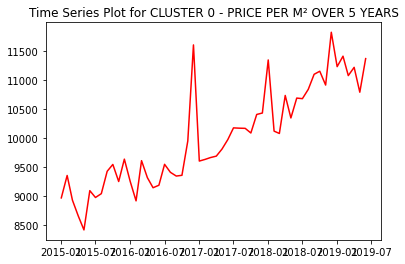

In [211]:
plt.plot(ts, color='r')
plt.title('Time Series Plot for CLUSTER 0 - PRICE PER M² OVER 5 YEARS')
plt.show()

In [291]:
result = seasonal_decompose(ts, model='multiplicative')

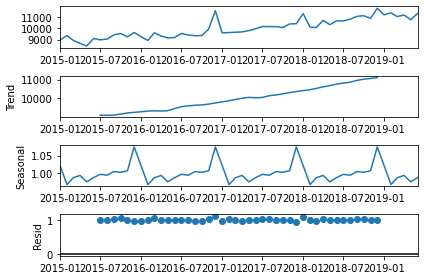

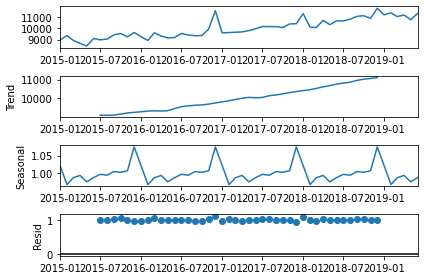

In [367]:
result.plot()

In [239]:
pip install pmdarima

     |████████████████████████████████| 1.5 MB 708 kB/s eta 0:00:01
     |████████████████████████████████| 2.0 MB 437 kB/s eta 0:00:01
  Attempting uninstall: Cython
    Found existing installation: Cython 0.29.21
    Uninstalling Cython-0.29.21:
      Successfully uninstalled Cython-0.29.21
Note: you may need to restart the kernel to use updated packages.


In [241]:
import pmdarima as pm
from pmdarima.model_selection import train_test_split
import numpy as np
import matplotlib.pyplot as plt

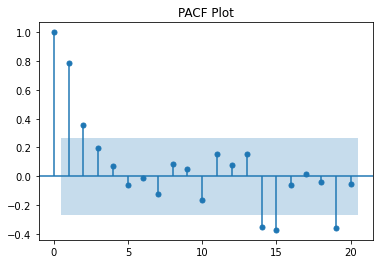

In [216]:
# DIAGNOSING PACF
pacf = plot_pacf(ts, lags = 20)
plt.title("PACF Plot")
pacf.show()

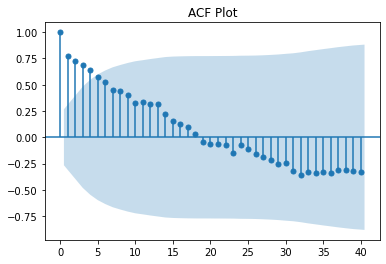

In [214]:
# DIAGNOSING ACF
acf = plot_acf(ts, lags = 40)
plt.title("ACF Plot")
acf.show()

In [217]:
# TRANSFORMING OUR DATA TO ADJUST FOR NON-STATIONARITY
ts_cluster0_diff = ts - ts.shift()
diff = ts_cluster0_diff.dropna()

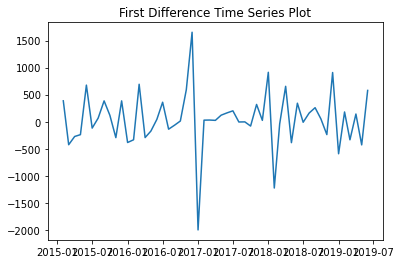

In [218]:
plt.figure()
plt.plot(diff)
plt.title('First Difference Time Series Plot')
plt.show()

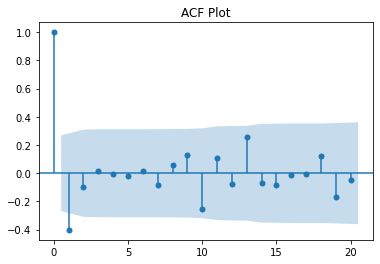

In [221]:
acfDiff = plot_acf(diff, lags = 20)
plt.title("ACF Plot")
acfDiff.show()

/opt/conda/lib/python3.8/site-packages/statsmodels/regression/linear_model.py:1434: RuntimeWarning: invalid value encountered in sqrt
  return rho, np.sqrt(sigmasq)


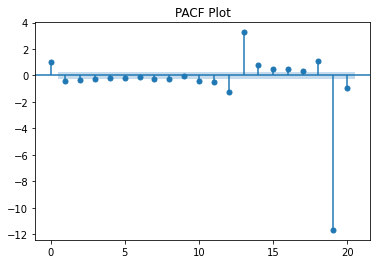

In [222]:
# edit this shit on the actual project !
pacfDiff = plot_pacf(diff, lags = 20)
plt.title("PACF Plot")
pacfDiff.show()

In [246]:
model = pm.auto_arima(ts, seasonal=True, m=12)

ARIMA(order=(3, 1, 1), scoring_args={}, seasonal_order=(0, 0, 0, 12),
      suppress_warnings=True)

In [300]:
ts.index.get_loc('2018-09-01')

44

In [294]:
ts.index

DatetimeIndex(['2015-01-01', '2015-02-01', '2015-03-01', '2015-04-01',
               '2015-05-01', '2015-06-01', '2015-07-01', '2015-08-01',
               '2015-09-01', '2015-10-01', '2015-11-01', '2015-12-01',
               '2016-01-01', '2016-02-01', '2016-03-01', '2016-04-01',
               '2016-05-01', '2016-06-01', '2016-07-01', '2016-08-01',
               '2016-09-01', '2016-10-01', '2016-11-01', '2016-12-01',
               '2017-01-01', '2017-02-01', '2017-03-01', '2017-04-01',
               '2017-05-01', '2017-06-01', '2017-07-01', '2017-08-01',
               '2017-09-01', '2017-10-01', '2017-11-01', '2017-12-01',
               '2018-01-01', '2018-02-01', '2018-03-01', '2018-04-01',
               '2018-05-01', '2018-06-01', '2018-07-01', '2018-08-01',
               '2018-09-01', '2018-10-01', '2018-11-01', '2018-12-01',
               '2019-01-01', '2019-02-01', '2019-03-01', '2019-04-01',
               '2019-05-01', '2019-06-01'],
              dtype='datetime64[n

In [328]:
mod = ARIMA(ts, order = (3, 1, 1), seasonal_order = (0,1,0,12))

/opt/conda/lib/python3.8/site-packages/statsmodels/tsa/base/tsa_model.py:524: ValueWarning: No frequency information was provided, so inferred frequency MS will be used.
  warnings.warn('No frequency information was'
/opt/conda/lib/python3.8/site-packages/statsmodels/tsa/base/tsa_model.py:524: ValueWarning: No frequency information was provided, so inferred frequency MS will be used.
  warnings.warn('No frequency information was'
/opt/conda/lib/python3.8/site-packages/statsmodels/tsa/base/tsa_model.py:524: ValueWarning: No frequency information was provided, so inferred frequency MS will be used.
  warnings.warn('No frequency information was'


In [329]:
results = mod.fit()
print(results.summary())

                                     SARIMAX Results                                     
Dep. Variable:                                 y   No. Observations:                   54
Model:             ARIMA(3, 1, 1)x(0, 1, [], 12)   Log Likelihood                -319.829
Date:                           Mon, 28 Dec 2020   AIC                            649.659
Time:                                   20:15:01   BIC                            658.226
Sample:                               01-01-2015   HQIC                           652.779
                                    - 06-01-2019                                         
Covariance Type:                             opg                                         
                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
ar.L1         -0.0976      0.144     -0.679      0.497      -0.379       0.184
ar.L2         -0.1600      0.190     -0.844

In [330]:
predVals = results.predict(53, 80, typ='levels')
print(predVals)

2019-06-01    11306.960111
2019-07-01    11318.271234
2019-08-01    11446.999038
2019-09-01    11698.161152
2019-10-01    11759.540850
2019-11-01    11524.199313
2019-12-01    12432.155605
2020-01-01    11839.236603
2020-02-01    12019.304454
2020-03-01    11685.519071
2020-04-01    11827.552561
2020-05-01    11399.510123
2020-06-01    11977.493656
2020-07-01    11930.770910
2020-08-01    12059.503777
2020-09-01    12310.665603
2020-10-01    12372.044091
2020-11-01    12136.702358
2020-12-01    13044.658884
2021-01-01    12451.739977
2021-02-01    12631.807794
2021-03-01    12298.022383
2021-04-01    12440.055875
2021-05-01    12012.013443
2021-06-01    12589.996978
2021-07-01    12543.274230
2021-08-01    12672.007096
2021-09-01    12923.168923
Freq: MS, Name: predicted_mean, dtype: float64


In [331]:
predVals.index[0]

Timestamp('2019-06-01 00:00:00', freq='MS')

In [332]:
predVals = predVals.drop(predVals.index[0])
print(predVals)

2019-07-01    11318.271234
2019-08-01    11446.999038
2019-09-01    11698.161152
2019-10-01    11759.540850
2019-11-01    11524.199313
2019-12-01    12432.155605
2020-01-01    11839.236603
2020-02-01    12019.304454
2020-03-01    11685.519071
2020-04-01    11827.552561
2020-05-01    11399.510123
2020-06-01    11977.493656
2020-07-01    11930.770910
2020-08-01    12059.503777
2020-09-01    12310.665603
2020-10-01    12372.044091
2020-11-01    12136.702358
2020-12-01    13044.658884
2021-01-01    12451.739977
2021-02-01    12631.807794
2021-03-01    12298.022383
2021-04-01    12440.055875
2021-05-01    12012.013443
2021-06-01    12589.996978
2021-07-01    12543.274230
2021-08-01    12672.007096
2021-09-01    12923.168923
Freq: MS, Name: predicted_mean, dtype: float64


In [333]:
ts_for = pd.concat([ts, predVals], axis = 1, keys=['original', 'predicted'])
print(ts_for)

            original     predicted
2015-01-01    8968.0           NaN
2015-02-01    9354.0           NaN
2015-03-01    8929.0           NaN
2015-04-01    8656.0           NaN
2015-05-01    8417.0           NaN
...              ...           ...
2021-05-01       NaN  12012.013443
2021-06-01       NaN  12589.996978
2021-07-01       NaN  12543.274230
2021-08-01       NaN  12672.007096
2021-09-01       NaN  12923.168923

[81 rows x 2 columns]


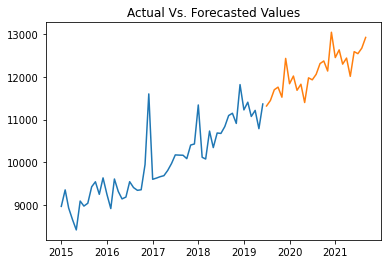

In [334]:
plt.figure()
plt.plot(ts_for)
plt.title("Actual Vs. Forecasted Values")
plt.show()

In [337]:
def forecast(df_aux, index1, index2): 
    ts_aux = pd.Series(df_aux['PRICE PER M²'].values, index = df_aux['DATE'])    
   
    model_auto = pm.auto_arima(ts_aux, seasonal=True, m=12)
    mod_aux = ARIMA(ts_aux, order = (model_auto.order[0], model_auto.order[1], model_auto.order[2]), seasonal_order = (0,1,0,12))
    
    results_aux = mod_aux.fit()
    
    predVals_aux = results_aux.predict(index1, index2, typ='levels')
    ts_for = pd.concat([ts_aux, predVals_aux], axis = 1, keys=['original', 'predicted'])
    
    return ts_for

/opt/conda/lib/python3.8/site-packages/statsmodels/tsa/base/tsa_model.py:524: ValueWarning: No frequency information was provided, so inferred frequency MS will be used.
  warnings.warn('No frequency information was'
/opt/conda/lib/python3.8/site-packages/statsmodels/tsa/base/tsa_model.py:524: ValueWarning: No frequency information was provided, so inferred frequency MS will be used.
  warnings.warn('No frequency information was'
/opt/conda/lib/python3.8/site-packages/statsmodels/tsa/base/tsa_model.py:524: ValueWarning: No frequency information was provided, so inferred frequency MS will be used.
  warnings.warn('No frequency information was'
/opt/conda/lib/python3.8/site-packages/statsmodels/tsa/base/tsa_model.py:524: ValueWarning: No frequency information was provided, so inferred frequency MS will be used.
  warnings.warn('No frequency information was'
/opt/conda/lib/python3.8/site-packages/statsmodels/tsa/base/tsa_model.py:524: ValueWarning: No frequency information was provided, s

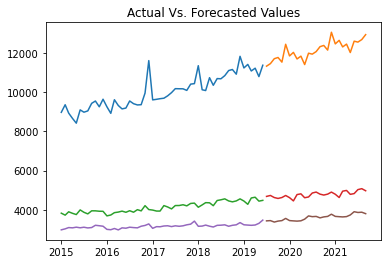

In [365]:
plt.figure()
plt.plot(forecast(df_cluster_0, 54, 80))
plt.title("Actual Vs. Forecasted Values")

plt.plot(forecast(df_cluster_1, 54, 80))
plt.title("Actual Vs. Forecasted Values")

plt.plot(forecast(df_cluster_2, 54, 80))
plt.title("Actual Vs. Forecasted Values")

#plt.legend 

plt.show()

## Graph 6 : (Forecast) Price per m² per city per year

In [773]:
spark.sql("SELECT *\
          FROM estate\
          ").show()

+----+----------+--------------------+------+-----------+-------+--------------+----------+-----------+---------------+---------+------------------+-------+
|City| Sale Date|           Sale Type| Price|Postal Code|Commune|Number of lots|Local Type|Living Area|Number of rooms|Land Area|      Price per M²|Cluster|
+----+----------+--------------------+------+-----------+-------+--------------+----------+-----------+---------------+---------+------------------+-------+
|NICE|26/03/2015|                SALE|102000|       6000|   NICE|             1| APARTMENT|       29.0|              2|      0.0|3517.2413793103447|      1|
|NICE|10/04/2015|                SALE|239000|       6200|   NICE|             1| APARTMENT|       51.0|              2|      0.0| 4686.274509803921|      1|
|NICE|23/03/2015|                SALE|410000|       6200|   NICE|             2| APARTMENT|       60.0|              3|      0.0| 6833.333333333333|      1|
|NICE|08/04/2015|                SALE|215000|       6200| 

In [780]:
spark.sql("SELECT `LOCAL TYPE`, SUBSTRING(`Sale Date`, 4, 7) as DATE, int(round(AVG(`Price per M²`))) \
          AS `PRICE PER M²` \
          FROM estate\
          GROUP BY `LOCAL TYPE`, DATE\
          ORDER BY `LOCAL TYPE`, DATE\
          ").show()

+----------+-------+------------+
|LOCAL TYPE|   DATE|PRICE PER M²|
+----------+-------+------------+
| APARTMENT|01/2015|        5494|
| APARTMENT|01/2016|        5017|
| APARTMENT|01/2017|        5944|
| APARTMENT|01/2018|        6645|
| APARTMENT|01/2019|        6531|
| APARTMENT|02/2015|        5488|
| APARTMENT|02/2016|        5300|
| APARTMENT|02/2017|        5853|
| APARTMENT|02/2018|        6065|
| APARTMENT|02/2019|        6700|
| APARTMENT|03/2015|        5606|
| APARTMENT|03/2016|        5793|
| APARTMENT|03/2017|        5942|
| APARTMENT|03/2018|        6212|
| APARTMENT|03/2019|        6471|
| APARTMENT|04/2015|        5347|
| APARTMENT|04/2016|        5682|
| APARTMENT|04/2017|        5832|
| APARTMENT|04/2018|        6373|
| APARTMENT|04/2019|        6604|
+----------+-------+------------+
only showing top 20 rows



In [56]:
df_6 = spark.sql("SELECT `LOCAL TYPE`, SUBSTRING(`Sale Date`, 4, 7) as DATE, int(round(AVG(`Price per M²`))) \
          AS `PRICE PER M²` \
          FROM estate\
          GROUP BY `LOCAL TYPE`, DATE\
          ORDER BY `LOCAL TYPE`, DATE\
          ").toPandas()

df_6

,LOCAL TYPE,DATE,PRICE PER M²
0,APARTMENT,01/2015,5494
1,APARTMENT,01/2016,5017
2,APARTMENT,01/2017,5944
3,APARTMENT,01/2018,6645
4,APARTMENT,01/2019,6531
...,...,...,...
103,HOUSE,11/2018,4336
104,HOUSE,12/2015,3710
105,HOUSE,12/2016,3862
106,HOUSE,12/2017,4105


In [57]:
df_6['DATE'] = pd.to_datetime(df_6['DATE'], format='%m/%Y')

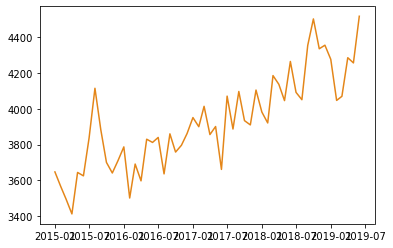

In [58]:
df_HOUSE = df_6[df_6['LOCAL TYPE'] == 'HOUSE']
df_HOUSE = df_HOUSE.sort_values(by='DATE')

plt.plot(df_HOUSE['DATE'], df_HOUSE['PRICE PER M²'], color='#E48619')
plt.show()

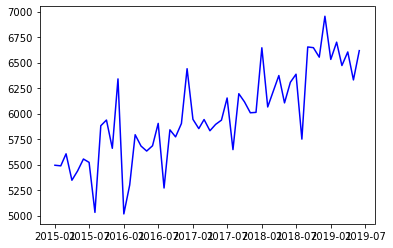

In [59]:
df_APARTMENT = df_6[df_6['LOCAL TYPE'] == 'APARTMENT']
df_APARTMENT = df_APARTMENT.sort_values(by='DATE')

plt.plot(df_APARTMENT['DATE'], df_APARTMENT['PRICE PER M²'], color='b')
plt.show()

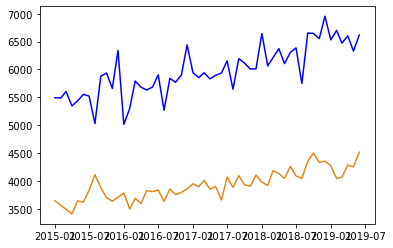

In [60]:
plt.plot(df_APARTMENT['DATE'], df_APARTMENT['PRICE PER M²'], color='b')
plt.plot(df_HOUSE['DATE'], df_HOUSE['PRICE PER M²'], color='#E48619')
plt.show()

Time series Analysis

In [368]:
def forecast(df_aux, index1, index2): 
    ts_aux = pd.Series(df_aux['PRICE PER M²'].values, index = df_aux['DATE'])    
   
    model_auto = pm.auto_arima(ts_aux, seasonal=True, m=12)
    mod_aux = ARIMA(ts_aux, order = (model_auto.order[0], model_auto.order[1], model_auto.order[2]), seasonal_order = (0,1,0,12))
    
    results_aux = mod_aux.fit()
    
    predVals_aux = results_aux.predict(index1, index2, typ='levels')
    ts_for = pd.concat([ts_aux, predVals_aux], axis = 1, keys=['original', 'predicted'])
    
    return ts_for

/opt/conda/lib/python3.8/site-packages/statsmodels/tsa/base/tsa_model.py:524: ValueWarning: No frequency information was provided, so inferred frequency MS will be used.
  warnings.warn('No frequency information was'
/opt/conda/lib/python3.8/site-packages/statsmodels/tsa/base/tsa_model.py:524: ValueWarning: No frequency information was provided, so inferred frequency MS will be used.
  warnings.warn('No frequency information was'
/opt/conda/lib/python3.8/site-packages/statsmodels/tsa/base/tsa_model.py:524: ValueWarning: No frequency information was provided, so inferred frequency MS will be used.
  warnings.warn('No frequency information was'
/opt/conda/lib/python3.8/site-packages/statsmodels/tsa/base/tsa_model.py:524: ValueWarning: No frequency information was provided, so inferred frequency MS will be used.
  warnings.warn('No frequency information was'
/opt/conda/lib/python3.8/site-packages/statsmodels/tsa/base/tsa_model.py:524: ValueWarning: No frequency information was provided, s

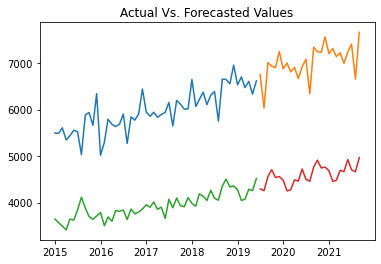

In [369]:
plt.figure()
plt.plot(forecast(df_APARTMENT, 54, 80))
plt.title("Actual Vs. Forecasted Values")

plt.plot(forecast(df_HOUSE, 54, 80))
plt.title("Actual Vs. Forecasted Values")

#plt.legend 

plt.show()

## Graph 7 - Price per m² vs nb of rooms per city

In [794]:
spark.sql("SELECT *\
          FROM estate\
          ").show()

+----+----------+--------------------+------+-----------+-------+--------------+----------+-----------+---------------+---------+------------------+-------+
|City| Sale Date|           Sale Type| Price|Postal Code|Commune|Number of lots|Local Type|Living Area|Number of rooms|Land Area|      Price per M²|Cluster|
+----+----------+--------------------+------+-----------+-------+--------------+----------+-----------+---------------+---------+------------------+-------+
|NICE|26/03/2015|                SALE|102000|       6000|   NICE|             1| APARTMENT|       29.0|              2|      0.0|3517.2413793103447|      1|
|NICE|10/04/2015|                SALE|239000|       6200|   NICE|             1| APARTMENT|       51.0|              2|      0.0| 4686.274509803921|      1|
|NICE|23/03/2015|                SALE|410000|       6200|   NICE|             2| APARTMENT|       60.0|              3|      0.0| 6833.333333333333|      1|
|NICE|08/04/2015|                SALE|215000|       6200| 

In [800]:
spark.sql("SELECT `NUMBER OF ROOMS`, int(round(AVG(`Price per M²`)))\
          AS `PRICE PER M²`\
          FROM estate\
          GROUP BY  `NUMBER OF ROOMS`\
          ORDER BY `NUMBER OF ROOMS`\
          ").show()

+---------------+------------+
|NUMBER OF ROOMS|PRICE PER M²|
+---------------+------------+
|              0|        7035|
|              1|        7096|
|              2|        6148|
|              3|        5172|
|              4|        4752|
|              5|        5191|
|              6|        5880|
|              7|        5996|
|              8|        6073|
|              9|        6227|
|             10|        6709|
|             11|        5548|
|             12|        6131|
|             13|        3044|
|             14|        6347|
|             15|        7028|
|             16|        3509|
|             17|        9290|
|             18|       30273|
|             19|       10538|
+---------------+------------+
only showing top 20 rows



In [61]:
df_7 = spark.sql("SELECT `NUMBER OF ROOMS`, int(round(AVG(`Price per M²`)))\
          AS `PRICE PER M²`\
          FROM estate\
          GROUP BY  `NUMBER OF ROOMS`\
          ORDER BY `NUMBER OF ROOMS`\
          ").toPandas()
df_7

,NUMBER OF ROOMS,PRICE PER M²
0,0,7035
1,1,7096
2,2,6148
3,3,5172
4,4,4752
5,5,5191
6,6,5880
7,7,5996
8,8,6073
9,9,6227


Text(0, 0.5, 'Price per m² (€)')

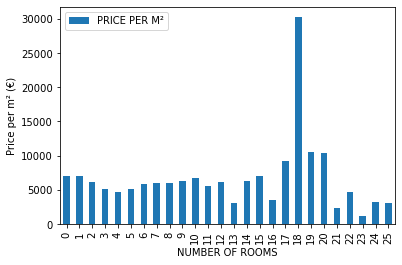

In [129]:
barplot_7 = df_7.plot.bar(x='NUMBER OF ROOMS', y='PRICE PER M²')

barplot_7.set_ylabel("Price per m² (€)")

#for p in barplot.patches:
#    barplot.annotate(str(p.get_height()), (p.get_x() * 1.005, p.get_height() * 1.005))

## Graph 8 - Total number of sales per price

In [63]:
spark.sql("SELECT *\
          FROM estate\
          ").show()

+----+----------+--------------------+------+-----------+-------+--------------+----------+-----------+---------------+---------+------------------+-------+
|City| Sale Date|           Sale Type| Price|Postal Code|Commune|Number of lots|Local Type|Living Area|Number of rooms|Land Area|      Price per M²|Cluster|
+----+----------+--------------------+------+-----------+-------+--------------+----------+-----------+---------------+---------+------------------+-------+
|NICE|26/03/2015|                SALE|102000|       6000|   NICE|             1| APARTMENT|       29.0|              2|      0.0|3517.2413793103447|      1|
|NICE|10/04/2015|                SALE|239000|       6200|   NICE|             1| APARTMENT|       51.0|              2|      0.0| 4686.274509803921|      1|
|NICE|23/03/2015|                SALE|410000|       6200|   NICE|             2| APARTMENT|       60.0|              3|      0.0| 6833.333333333333|      1|
|NICE|08/04/2015|                SALE|215000|       6200| 

In [101]:
spark.sql("SELECT FLOOR(PRICE/100000)*100000 AS PRICE, COUNT(*) AS `NUMBER OF SALES`\
                FROM ESTATE\
                GROUP BY FLOOR(PRICE/100000)*100000\
                ORDER BY COUNT(*) DESC\
          ").show()

+-------+---------------+
|  PRICE|NUMBER OF SALES|
+-------+---------------+
| 100000|         136510|
| 200000|          87305|
|      0|          55422|
| 300000|          48655|
| 400000|          29600|
| 500000|          18829|
| 600000|          12623|
| 700000|           8675|
| 800000|           6437|
| 900000|           4396|
|1000000|           3532|
|1100000|           2657|
|1200000|           2238|
|1300000|           1734|
|1400000|           1362|
|1500000|           1194|
|1600000|            882|
|1700000|            842|
|1800000|            679|
|2000000|            500|
+-------+---------------+
only showing top 20 rows



In [102]:
df_8 = spark.sql("SELECT FLOOR(PRICE/100000)*100000 AS PRICE, CLUSTER, COUNT(*) AS `NUMBER OF SALES`\
                FROM ESTATE\
                GROUP BY FLOOR(PRICE/100000)*100000, CLUSTER\
                ORDER BY COUNT(*) DESC, CLUSTER\
          ").toPandas()
df_8

,PRICE,CLUSTER,NUMBER OF SALES
0,100000,2,77666
1,0,2,40154
2,100000,1,36171
3,200000,2,34838
4,200000,0,29461
...,...,...,...
173,3200000,1,1
174,2700000,2,1
175,3700000,2,1
176,2600000,2,1


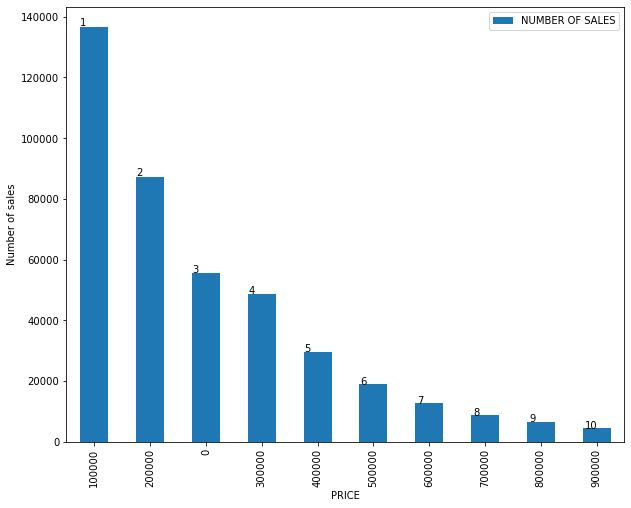

In [103]:
df_8_bis = df_8.groupby(['PRICE'])['NUMBER OF SALES'].sum()

df_8_bis_bis = pd.DataFrame({'PRICE':df_8_bis.index, 'NUMBER OF SALES':df_8_bis.values}).sort_values(by=['NUMBER OF SALES'], ascending=False)
df_8_bis_bis

#df_8_bis_bis[df_8_bis_bis['PRICE']==100000].index.values.astype(int)[0]

barplot_8_bis_bis = df_8_bis_bis[df_8_bis_bis['PRICE'] < 1000000].plot.bar(x='PRICE', y='NUMBER OF SALES')

barplot_8_bis_bis.set_ylabel("Number of sales")

k=1
for p in barplot_8_bis_bis.patches:
    barplot_8_bis_bis.annotate(str(df_8_bis_bis[df_8_bis_bis['PRICE']==df_8_bis_bis.loc[k]['PRICE']].index.values.astype(int)[0]), (p.get_x() * 1.005, p.get_height() * 1.005))
    k += 1

In [104]:
#df_8_temp = df_8[df_8_bis_bis['PRICE'] < 1000000]

df_8_pivot = df_8[df_8['PRICE'] < 1000000].pivot(index='PRICE', columns='CLUSTER', values='NUMBER OF SALES').fillna(0)
#df_8_pivot[0] 

df_8_pivot["sum_row"] = df_8_pivot[0] + df_8_pivot[1] + df_8_pivot[2]
df_8_pivot = df_8_pivot.sort_values("sum_row", ascending=False)

list_ranking = list(df_8_pivot["sum_row"])

df_8_pivot = df_8_pivot.drop("sum_row", axis=1)

df_8_pivot
list_ranking

[136510, 87305, 55422, 48655, 29600, 18829, 12623, 8675, 6437, 4396]

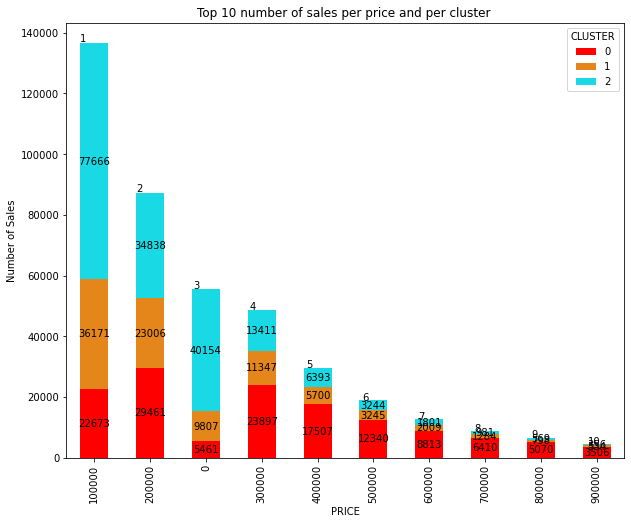

In [105]:
barplot_8_pivot = df_8_pivot.plot(kind='bar', stacked=True, color = colors)

barplot_8_pivot.set_ylabel("Number of Sales")

barplot_8_pivot.set_title('Top 10 number of sales per price and per cluster ')

for p in barplot_8_pivot.patches:
    width, height = p.get_width(), p.get_height()
    x, y = p.get_xy() 
    barplot_8_pivot.text(x+width/2, 
            y+height/2, 
            '{:.0f}'.format(height), 
            horizontalalignment='center', 
            verticalalignment='center')
    
j=1 
for p in barplot_8_pivot.patches:
    if j<=10:
        barplot_8_pivot.annotate(str(j), (p.get_x() * 1.01, list_ranking[j-1] * 1.005))
        j += 1
        
plt.rcParams['figure.figsize'] = (20,8)

## Graph 9 - Price per m² per city per year

In [70]:
estate_clean_df_explicit.printSchema()

root
 |-- City: string (nullable = false)
 |-- Sale Date: string (nullable = false)
 |-- Sale Type: string (nullable = false)
 |-- Price: long (nullable = false)
 |-- Postal Code: string (nullable = false)
 |-- Commune: string (nullable = false)
 |-- Number of lots: long (nullable = false)
 |-- Local Type: string (nullable = false)
 |-- Living Area: double (nullable = false)
 |-- Number of rooms: long (nullable = false)
 |-- Land Area: double (nullable = false)
 |-- Price per M²: double (nullable = false)
 |-- Cluster: integer (nullable = false)



In [181]:
spark.sql("SELECT CITY, SUBSTRING(`Sale Date`, 7, 4) as DATE, int(round(AVG(`Price per M²`))) \
          AS `PRICE PER M²`, CLUSTER \
          FROM estate\
          GROUP BY CITY, DATE, CLUSTER\
          ORDER BY CLUSTER, CITY, DATE\
          ").show()

+--------+----+------------+-------+
|    CITY|DATE|PRICE PER M²|CLUSTER|
+--------+----+------------+-------+
|   PARIS|2015|        9159|      0|
|   PARIS|2016|        9602|      0|
|   PARIS|2017|        9978|      0|
|   PARIS|2018|       10810|      0|
|   PARIS|2019|       11187|      0|
|BORDEAUX|2015|        3828|      1|
|BORDEAUX|2016|        3889|      1|
|BORDEAUX|2017|        4324|      1|
|BORDEAUX|2018|        4778|      1|
|BORDEAUX|2019|        4864|      1|
|    LYON|2015|        3787|      1|
|    LYON|2016|        3850|      1|
|    LYON|2017|        4045|      1|
|    LYON|2018|        4255|      1|
|    LYON|2019|        4340|      1|
|    NICE|2015|        4069|      1|
|    NICE|2016|        4058|      1|
|    NICE|2017|        4155|      1|
|    NICE|2018|        4230|      1|
|    NICE|2019|        4267|      1|
+--------+----+------------+-------+
only showing top 20 rows



In [106]:
df_9 = spark.sql("SELECT CITY, SUBSTRING(`Sale Date`, 7, 4) as DATE, int(round(AVG(`Price per M²`))) \
          AS `PRICE PER M²`, CLUSTER \
          FROM estate\
          GROUP BY CITY, DATE, CLUSTER\
          ORDER BY CLUSTER, CITY, DATE\
          ").toPandas()
df_9

,CITY,DATE,PRICE PER M²,CLUSTER
0,PARIS,2015,9159,0
1,PARIS,2016,9602,0
2,PARIS,2017,9978,0
3,PARIS,2018,10810,0
4,PARIS,2019,11187,0
5,BORDEAUX,2015,3828,1
6,BORDEAUX,2016,3889,1
7,BORDEAUX,2017,4324,1
8,BORDEAUX,2018,4778,1
9,BORDEAUX,2019,4864,1


In [107]:
colors_9 = {'2015' : '#1B06EC', '2016' : '#EC7906', '2017' : '#EC0D06', '2018' : '#06ECE5', '2019' : '#06EC3E'}

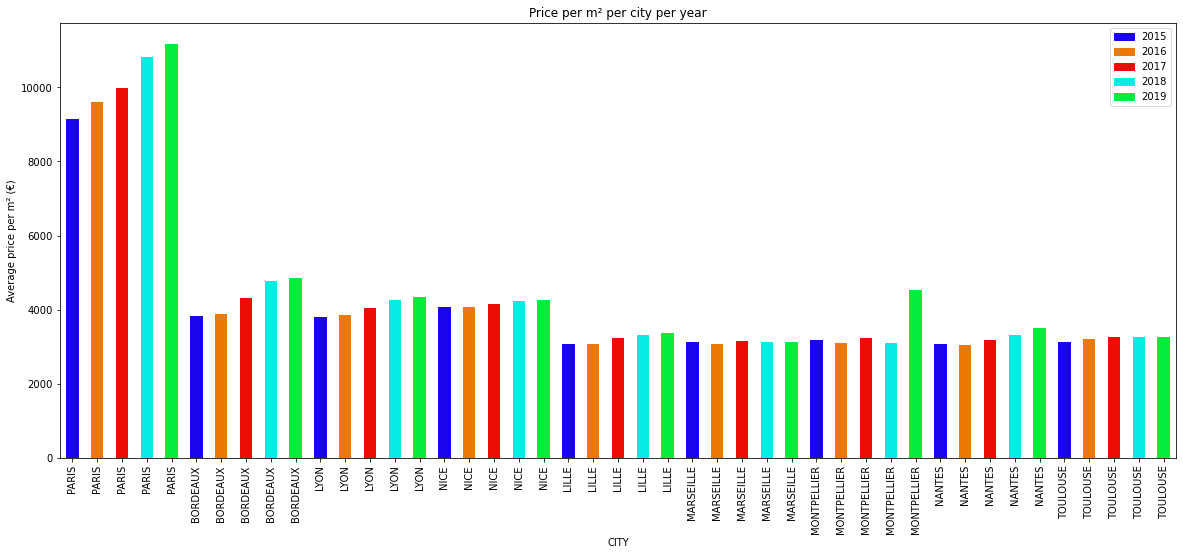

In [108]:
labels = list(colors_9.keys())
handles = [plt.Rectangle((0,0),1,1, color=colors_9[label]) for label in labels]

barplot_9 = df_9.plot.bar(x='CITY', y='PRICE PER M²', color = df_9['DATE'].map(colors_9))
barplot_9.set_ylabel("Average price per m² (€)")
barplot_9.legend(handles, labels)
barplot_9.set_title("Price per m² per city per year")

plt.rcParams['figure.figsize'] = (10,8)